In [16]:
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy
import matplotlib.pyplot as plt
import pyregion
from tqdm import tqdm
from astropy.table import QTable
import warnings
import numpy as np
warnings.filterwarnings("ignore")

plt.style.use('paper')

In [17]:
# LOAD MAPS 

inputfile_rgb_fits1 = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/data_regrid/hershel160.fits'
inputfile_rgb_png1 = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/rgb_final_uncropped.jpeg'
hdu_rgb1 = fits.open(inputfile_rgb_fits1)[0]

inputfile_rgb_fits = './data/cutout-IPAC_P_GLIMPSE360_hr.fits'
inputfile_rgb_png = './data/cutout-IPAC_P_GLIMPSE360_hr.jpg'
hdu_rgb = fits.open(inputfile_rgb_fits)[0]
hdu_rgb.data = hdu_rgb.data[0]
hdu_rgb.header['NAXIS'] = 2
del hdu_rgb.header['*3*']
del hdu_rgb.header['*4*']

In [18]:
# LOAD REGIONS 

def get_maskfromregionfile_BOX(file, hdu):

    with open(file, 'r') as file:
        region_string = file.read()

    regs = pyregion.parse(region_string)

    masks = []
    for reg_ in tqdm(regs):

        l,b,w,h,pa = reg_.params
        region_string = 'galactic;box(%s,%s,%s,%s,%s)' % (l.text,b.text,w.text,h.text,pa.text)
        reg = pyregion.parse(region_string)
        masks += [reg.get_mask(hdu=hdu)]

    mask = sum(masks)>0
    hdu_mask = fits.PrimaryHDU(mask.astype(int), hdu_rgb.header)

    return(hdu_mask)

def get_maskfromregionfile_POLY(file, hdu):

    with open(file, 'r') as file:
        region_string = file.read()

    reg = pyregion.parse(region_string)
    mask = reg.get_mask(hdu=hdu)

    hdu_mask = fits.PrimaryHDU(mask.astype(int), hdu_rgb.header)

    return(hdu_mask)

# JWST COVERAGE REGION
hdu_JWSTmask = get_maskfromregionfile_BOX('./regions/grid_singlepointing_6tight_gal.reg', hdu_rgb)
hdu_GNSmask = get_maskfromregionfile_POLY('./regions/GALACTICNUCLEUS_polygon.reg', hdu_rgb)

100%|██████████| 139/139 [00:43<00:00,  3.17it/s]


In [19]:
# LOAD ORBIT
table_orbit = QTable.read('./orbit/orbit_KDL15.dat', format='ascii')

In [20]:
# Wide
l = 0
b = 0
width = 1.8
height = 1.3

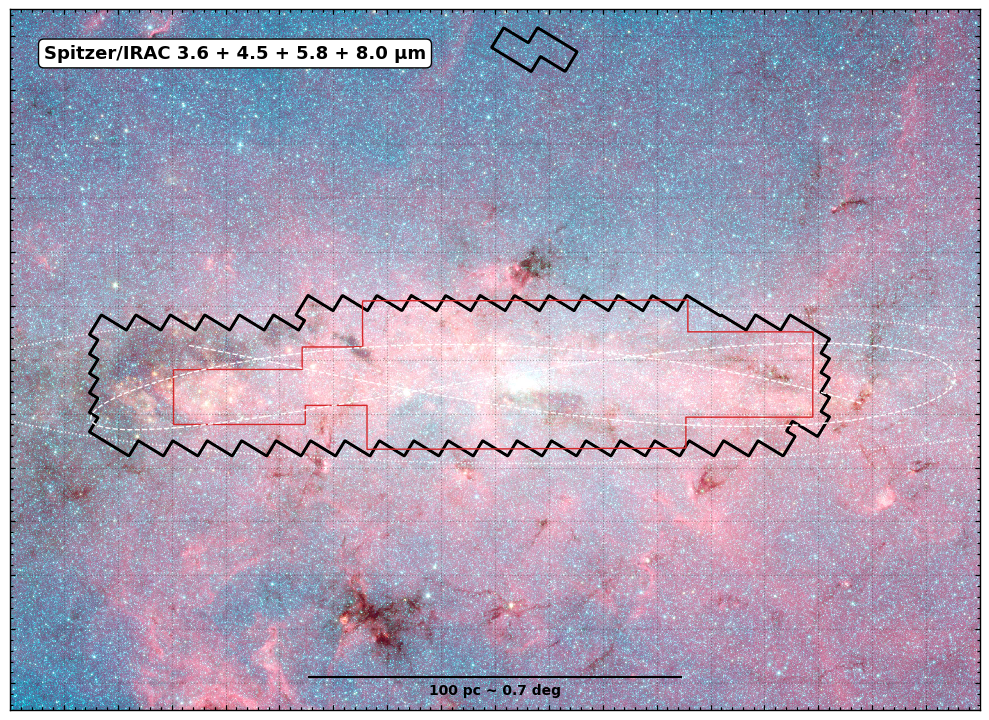

In [21]:
fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_rgb, figure=fig, subplot=(1,1,1))
ax.show_rgb(inputfile_rgb_png)

# ax.show_lines([np.array([[0,1], [0,1]])], color='C0', linewidth=1, alpha=1, linestyle='-')

# ax.show_contour(hdu_mask, levels=[1,1], colors='black', linewidths=0, filled=True, alpha=0.5)
ax.show_contour(hdu_JWSTmask, levels=[1], colors='black', linewidths=2)
ax.show_contour(hdu_GNSmask, levels=[1], colors='C3', linewidths=1)

ax.show_ellipses(359.9236318, -0.0468039, 1.0944453*2, 0.1455558*2, 0, edgecolor='white', facecolor='none', linewidth=1, linestyles=':')

ax.add_scalebar((100/0.04)/3600, '100 pc ~ 0.7 deg', color='black', corner='bottom', linewidth=1.5)

ax.add_label(0.035, 0.95, r'Spitzer/IRAC 3.6 + 4.5 + 5.8 + 8.0 μm', relative=True, color='black', 
             bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=13, ha='left', va='top', zorder=15)

ax.recenter(l, b, width=width, height=height)

ax.ticks.set_xspacing(0.1)
ax.ticks.set_yspacing(0.1)

ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('white')

pix_orbit = ax.world2pixel(table_orbit['col10'], table_orbit['col11'])

for i, ax in enumerate(fig.get_axes()):
    axes = fig.get_axes()
    ra_ = axes[i].coords[0]
    dec_ = axes[i].coords[1]
    dec_.ticklabels.set_rotation(90)
    axes[i].grid(True, alpha=0.25, ls=':', color='black')
    axes[i].plot(pix_orbit[0], pix_orbit[1], alpha=1, color='white', linewidth=1, linestyle='--')

fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()
fig.savefig('./rgb.png', dpi=150, bbox_inches='tight', transparent=True)

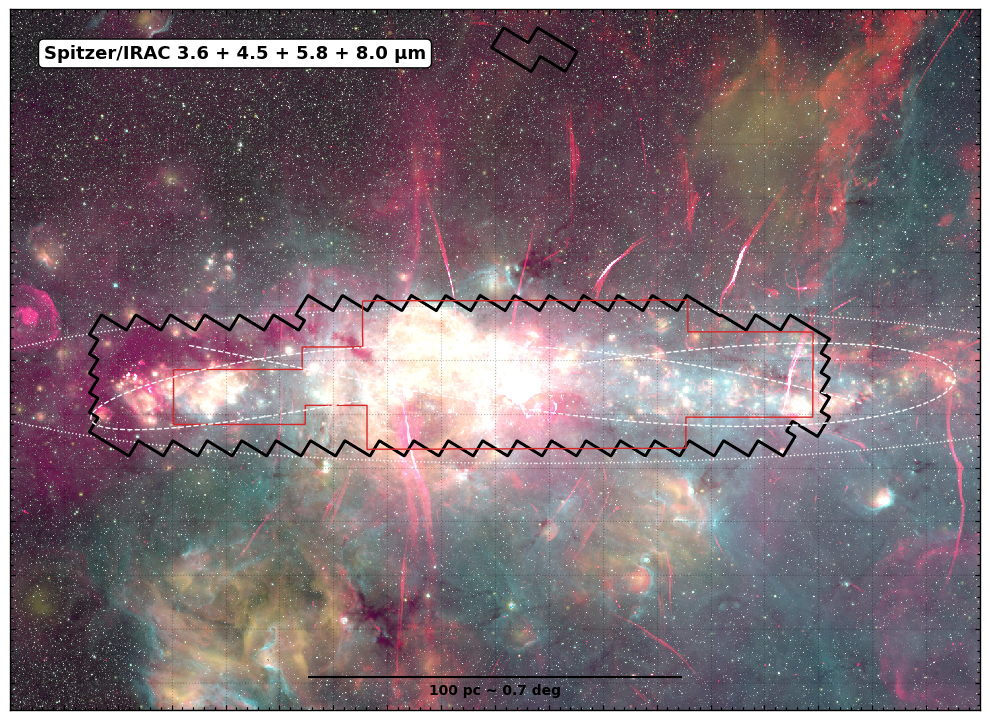

In [22]:
fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_rgb1, figure=fig, subplot=(1,1,1))
ax.show_rgb(inputfile_rgb_png1)

# ax.show_lines([np.array([[0,1], [0,1]])], color='C0', linewidth=1, alpha=1, linestyle='-')

# ax.show_contour(hdu_mask, levels=[1,1], colors='black', linewidths=0, filled=True, alpha=0.5)
ax.show_contour(hdu_JWSTmask, levels=[1], colors='black', linewidths=2)
ax.show_contour(hdu_GNSmask, levels=[1], colors='C3', linewidths=1)

ax.show_ellipses(359.9236318, -0.0468039, 1.0944453*2, 0.1455558*2, 0, edgecolor='white', facecolor='none', linewidth=1, linestyles=':')

ax.add_scalebar((100/0.04)/3600, '100 pc ~ 0.7 deg', color='black', corner='bottom', linewidth=1.5)

ax.add_label(0.035, 0.95, r'Spitzer/IRAC 3.6 + 4.5 + 5.8 + 8.0 μm', relative=True, color='black', 
             bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=13, ha='left', va='top', zorder=15)

ax.recenter(l, b, width=width, height=height)

ax.ticks.set_xspacing(0.1)
ax.ticks.set_yspacing(0.1)

ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('white')

pix_orbit = ax.world2pixel(table_orbit['col10'], table_orbit['col11'])

for i, ax in enumerate(fig.get_axes()):
    axes = fig.get_axes()
    ra_ = axes[i].coords[0]
    dec_ = axes[i].coords[1]
    dec_.ticklabels.set_rotation(90)
    axes[i].grid(True, alpha=0.25, ls=':', color='black')
    axes[i].plot(pix_orbit[0], pix_orbit[1], alpha=1, color='white', linewidth=1, linestyle='--')

fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()
fig.savefig('./rgb3.png', dpi=150, bbox_inches='tight', transparent=True)